In [51]:
# https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [83]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
# read in test and train files
titanic_train = pd.read_csv("C:/Users/avitosky/Documents/Kaggle/Titanic/train.csv")
titanic_test = pd.read_csv("C:/Users/avitosky/Documents/Kaggle/Titanic/test.csv")
combine = [titanic_train, titanic_test]

In [85]:
# preview the training data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
# preview the test data
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
# background info - we're missing values for Age, Cabin, Embarked, and Fare, let's work on filling those in
titanic_train.info()
print("-------------------------------------")
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null ob

In [88]:
# we see here that age has a mean of 29 and std of 14, let's fill in missing values using those 
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [89]:
# similar values in the test set, so we'll fill in NaN in similar fashion
titanic_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [90]:
# Count the number of NaN values in both the train and test set
count_nan_age_train = titanic_train["Age"].isnull().sum()
count_nan_age_test = titanic_test["Age"].isnull().sum()

In [91]:
# create a range based on mean and std and generate that many random ints
rand_train = np.random.randint(29.69 - 14.52, 29.69 + 14.52, size = count_nan_age_train)
rand_test = np.random.randint(30.27 - 14.18, 30.27 + 14.18, size = count_nan_age_test)

In [92]:
# reaplce NaN values with random numbers that we generated
titanic_train["Age"][np.isnan(titanic_train["Age"])] = rand_train
titanic_test["Age"][np.isnan(titanic_test["Age"])] = rand_test

C:\Users\avitosky\AppData\Local\Continuum\Anaconda5\envs\TensorFlow\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\avitosky\AppData\Local\Continuum\Anaconda5\envs\TensorFlow\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [93]:
# convert type from float to int
titanic_train['Age'] = titanic_train['Age'].astype(int)
titanic_test['Age'] = titanic_test['Age'].astype(int)

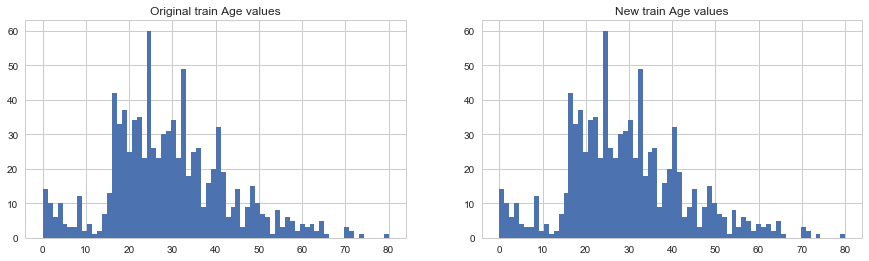

In [94]:
# distribution of values looks pretty similar  so we'll move forward
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
titanic_train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
titanic_train['Age'].hist(bins=70, ax=axis2)
axis1.set_title("Original train Age values")
axis2.set_title("New train Age values")

In [95]:
# we're missing two values in Embarkd in the training set so let's see how those are distributed
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
# 'S' has the highest count by far so fill two missing values in 'Embarked' with 'S'
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("S")

In [97]:
# map Embarked values to numbers because cannot analyze data on categorical data
titanic_train['Embarked'] = titanic_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic_test['Embarked'] = titanic_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [98]:
# we're missing one Fare amount in the test set so let's find the median of Fare and fill it with that value
titanic_test['Fare'].fillna((titanic_test['Fare'].median()), inplace=True)

In [99]:
# convert type from float to int
titanic_train['Fare'] = titanic_train['Fare'].astype(int)
titanic_test['Fare'] = titanic_test['Fare'].astype(int)

In [100]:
# let's look at the Cabin column in the training set
titanic_train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [101]:
# let's look at the Cabin column in the test set
titanic_test['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [102]:
# Ticket also has a lot of unique values that wont help us
titanic_train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [103]:
# same deal in the test set so let's go ahead and drop this
titanic_test['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [104]:
# let's remove Ticket, Cabin, and Name because we have PassengerId that we can tie back to Name later if needed
titanic_train = titanic_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [105]:
# looks like we have filled in all of our missing values
titanic_train.info()
print("-------------------------------------")
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int32
Embarked       891 non-null int32
dtypes: int32(3), int64(5), object(1)
memory usage: 52.3+ KB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
Embarked       418 non-null int32
dtypes: int32(3), int64(4), object(1)
memory usage: 21.3+ KB


In [106]:
# explore correlations for 'Survived' by Sex, mostly women survived
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [107]:
# explore correlations for 'Survived' by Pclass, greater chance of surviving for higher class
titanic_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [108]:
# explore correlations for 'Embarked' by Pclass, no relation to where they embarked from
titanic_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [109]:
# explore correlations for 'Survived' by SibSp
titanic_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [110]:
# explore correlations for 'Survived' Parch
titanic_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


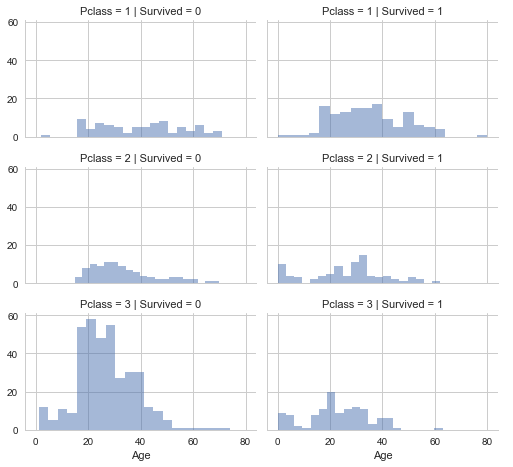

In [111]:
# grid plotting historgrams to see and compare survival rates with classes/age
grid = sns.FacetGrid(titanic_train, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend();

In [112]:
# background info
titanic_train.info()
print("-------------------------------------")
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int32
Embarked       891 non-null int32
dtypes: int32(3), int64(5), object(1)
memory usage: 52.3+ KB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
Embarked       418 non-null int32
dtypes: int32(3), int64(4), object(1)
memory usage: 21.3+ KB


In [113]:
titanic_train['Sex'] = titanic_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


In [114]:
titanic_test['Sex'] = titanic_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7,2
1,893,3,1,47,1,0,7,0
2,894,2,0,62,0,0,9,2
3,895,3,0,27,0,0,8,0
4,896,3,1,22,1,1,12,0


In [125]:
X_train = titanic_train.drop(["Survived", "PassengerId"], axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [126]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.459999999999994

In [150]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

acc_svc

89.450000000000003

In [156]:
knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

acc_knn

80.129999999999995

In [158]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

acc_gaussian

79.349999999999994

In [170]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred_random_forest = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest 

96.859999999999999

In [160]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Survived,-0.963025
1,Pclass,2.599998
2,Sex,-0.028519
3,Age,-0.295974
4,SibSp,-0.073723
5,Parch,0.003190
6,Fare,0.236151
7,Embarked,NaN


In [163]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,96.86
0,Support Vector Machines,89.45
1,KNN,80.13
2,Logistic Regression,79.46
4,Naive Bayes,79.35


In [171]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Y_pred_random_forest
    })
submission.to_csv('titanic.csv', index=False)

In [172]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0
